In [1]:
import pandas as pd
import requests
import yfinance as yf
import datetime 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = yf.download("TSLA", start="2019-01-01", end="2021-04-01",group_by="ticker") 
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-31   67.557999   67.842003   65.052002   66.559998   66.559998   
2019-01-02   61.220001   63.026001   59.759998   62.023998   62.023998   
2019-01-03   61.400002   61.880001   59.476002   60.071999   60.071999   
2019-01-04   61.200001   63.599998   60.546001   63.537998   63.537998   
2019-01-07   64.344002   67.348000   63.549999   66.991997   66.991997   
...                ...         ...         ...         ...         ...   
2021-03-25  613.000000  645.500000  609.500000  640.390015  640.390015   
2021-03-26  641.869995  643.820007  599.890015  618.710022  618.710022   
2021-03-29  615.640015  616.479980  596.020020  611.289978  611.289978   
2021-03-30  601.750000  637.659973  591.010010  635.619995  635.619995   
2021-03-31  646.619995  672.000000  641.109

In [3]:
TSLA=df

In [4]:
TSLA=df

In [5]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,234.624124,240.477831,228.092825,234.860811,234.860811,5.783942e+07
std,241.668773,247.233076,234.865670,241.777390,241.777390,3.534962e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,1.232800e+07
25%,54.288000,55.000000,53.548000,54.646000,54.646000,3.319890e+07
50%,109.477997,112.888000,106.468002,109.440002,109.440002,4.732300e+07
75%,406.029999,412.490005,391.799988,406.509995,406.509995,7.384550e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [6]:
TSLA['Close'].shift(-1)

Date
2018-12-31     62.023998
2019-01-02     60.071999
2019-01-03     63.537998
2019-01-04     66.991997
2019-01-07     67.070000
                 ...    
2021-03-25    618.710022
2021-03-26    611.289978
2021-03-29    635.619995
2021-03-30    667.929993
2021-03-31           NaN
Name: Close, Length: 567, dtype: float64

In [7]:
# TSLA['price1']=TSLA['Close'].shift(-1)
TSLA['Close1']=TSLA['Close'].shift(-1)

In [8]:
TSLA

,Open,High,Low,Close,Adj Close,Volume,Close1
Date,,,,,,,
2018-12-31,67.557999,67.842003,65.052002,66.559998,66.559998,31511500,62.023998
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000,60.071999
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000,63.537998
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500,66.991997
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000,67.070000
...,...,...,...,...,...,...,...
2021-03-25,613.000000,645.500000,609.500000,640.390015,640.390015,39224900,618.710022
2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022,33778400,611.289978
2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978,28637000,635.619995


In [9]:
TSLA['priceDiff']=TSLA['Close1']-TSLA['Close']

In [10]:
TSLA['return']=TSLA['priceDiff']/TSLA['Close']

In [11]:
#List Comprehesion
#Selecting data by row numbers (.iloc)
#Selecting data by label or by a conditional statment (.loc)
TSLA['direction']=[1 if TSLA.loc[ei,'priceDiff']>0 else -1 for ei in TSLA.index]

In [12]:
#MovingAverage
TSLA['Avg3']=(TSLA['Close']+TSLA['Close'].shift(1)+TSLA['Close'].shift(2))/3

In [13]:
#calculate moving average using rolling 
TSLA['MA40']=TSLA['Close'].rolling(40).mean()

In [14]:
TSLA['MA200']=TSLA['Close'].rolling(200).mean()

In [15]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

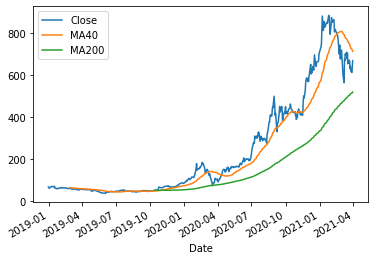

In [16]:
TSLA['Close'].plot(legend=True)
TSLA['MA40'].plot(legend=True)
TSLA['MA200'].plot(legend=True)
##
#If MA40 is above MA200, some traders who we call trend-following traders,
#they believe the stock price will move upwards for a while.

In [17]:
TSLA['Shares'] = [1 if TSLA.loc[ei,'MA40']>TSLA.loc[ei,'MA200'] else 0
                  for ei in TSLA.index]
TSLA['Shares']

Date
2018-12-31    0
2019-01-02    0
2019-01-03    0
2019-01-04    0
2019-01-07    0
             ..
2021-03-25    1
2021-03-26    1
2021-03-29    1
2021-03-30    1
2021-03-31    1
Name: Shares, Length: 567, dtype: int64

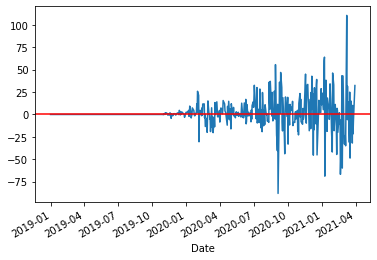

In [18]:
import matplotlib.pyplot as plt

TSLA['Profit'] = [TSLA.loc[ei,'Close1'] - TSLA.loc[ei,'Close']
                    if TSLA.loc[ei,'Shares']==1
                    else 0 for ei in TSLA.index]
TSLA['Profit'].plot()
plt.axhline(y=0,color='red')

In [19]:
TSLA['wealth'] = TSLA['Profit'].cumsum()
TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume,Close1,priceDiff,return,direction,Avg3,MA40,MA200,Shares,Profit,wealth
Date,,,,,,,,,,,,,,,,
2021-03-25,613.000000,645.500000,609.500000,640.390015,640.390015,39224900,618.710022,-21.679993,-0.033854,-1,644.273336,732.324748,509.119349,1,-21.679993,555.726021
2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022,33778400,611.289978,-7.420044,-0.011993,-1,629.790019,726.906749,511.187849,1,-7.420044,548.305977
2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978,28637000,635.619995,24.330017,0.039801,1,623.463338,722.350748,513.271459,1,24.330017,572.635994
2021-03-30,601.750000,637.659973,591.010010,635.619995,635.619995,39432400,667.929993,32.309998,0.050832,1,621.873332,717.245998,515.514279,1,32.309998,604.945992
2021-03-31,646.619995,672.000000,641.109985,667.929993,667.929993,33337300,NaN,NaN,NaN,-1,638.279989,712.124498,517.863029,1,NaN,NaN


In [20]:
print("Total money you win is ", TSLA.loc[TSLA.index[-2],'wealth'])
print("Total money you spent is ", TSLA.loc[TSLA.index[0],'Close'])

Total money you win is  604.9459915161133
Total money you spent is  66.55999755859375


<AxesSubplot:>

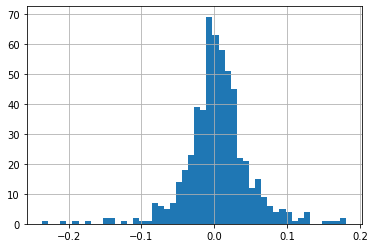

In [21]:
import numpy as np
TSLA['LogReturn'] = np.log(TSLA['Close']).shift(-1) - np.log(TSLA['Close'])
TSLA['LogReturn'].hist(bins=50)

In [22]:
mu = TSLA['LogReturn'].mean()
sigma = TSLA['LogReturn'].std(ddof=1)
print(mu, sigma)

0.004074345595102235 0.04570061425334092


In [23]:
from scipy.stats import norm

mu220 = 220*mu
sigma220 = 220**0.5*sigma
print(mu220, sigma220)

print('The probability of dropping over 20% in 220 days is ',
     norm.cdf(-0.4, mu220,sigma220))

0.8963560309224917 0.6778496525699388
The probability of dropping over 20% in 220 days is  0.027909017189078386


In [24]:
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = TSLA['LogReturn'].mean()
sample_std = TSLA['LogReturn'].std(ddof=1)/(TSLA.shape[0])**0.5

In [25]:
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std
print("Sample Mean is ", sample_mean)
print("*****************************************")
print("80% confidence interval is ")
print(interval_left, interval_right)

Sample Mean is  0.004074345595102235
*****************************************
80% confidence interval is 
0.001614733650565282 0.0065339575396391875


In [26]:
n = TSLA['LogReturn'].shape[0]
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

50.54973527525584


In [27]:
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
print(zleft, zright)
print('At the significance level of ', alpha)
print('Shall we reject?:', zhat>zright or zhat<zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of  0.05
Shall we reject?: True
